Runga Kutta methods are used to approximate the value to simultaneous non-linear differential equations. <br>
More about Runga Kutta Methods [here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Here we will try to solve the following three equations with unknown variables S, I and R.

\begin{equation}
\frac{d S(t)}{d t}=A-\mu S(t)-\frac{r I}{N_0} S(t)
\end{equation}
<br>
$$
\frac{d I(t)}{d t}=\frac{r I(t)}{N_0} S(t)-(\mu+a) I(t)
$$
<br>
$$
\frac{d R(t)}{d t}=a I(t)-\mu R(t)
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
where, $\mathrm{S}(\mathrm{t})+\mathrm{I}(\mathrm{t})+\mathrm{R}(\mathrm{t})=\mathrm{N}(\mathrm{t})$
<br><br>
$$
=>\frac{N(t)}{d t}=A-\mu N
$$

These equations have a physical significance also, they represent the SIR model for the transmission of tuberclosis as documented [here](https://drive.google.com/file/d/1t2Rgh1jdEmT_aJ7RKAkDf0ZH_lhFM2sp/view?usp=sharing). 

S, I and R represent the following three kinds of people:


1.   S: The first category is individuals who have not been infected with the TB virus, sometimes known as the suspicion group.  
2.   I: The second category consists of people who have been infected with the TB virus.
3.   R: The last category consists of people who recovered or died
after being infected with the TB virus.




Other than S, I and R, all other terms are constants, and the equations can be represented as follows:

In [18]:
def dS_dt(S, I, R, t):
    return (1449401 -  0.001167*S - (0.5/1449401)*I*S)

In [19]:
def dI_dt(S, I, R, t):
    return ((0.5/1449401)*I*S - (0.001167 + 0.111111)*I)

In [20]:
def dR_dt(S, I, R, t):
    return  (0.111111*I - 0.001167*R)

In [22]:
t = int(input())  # Enter a required value of time where you want the value of S, I and R.

10


In [23]:
S_data = []
I_data = []
R_data = []
SIR_data = []
N_data = []
Time = []

**Runge-Kutta method implementation with S,I,R as dependent variables and t as independent variable**

In [24]:
def rungeKutta(S0, I0, R0, t, h):

  # No of iterations = n
  # Step size = h
    n = (int)((t)/h)
  
  # setting initial values
    S = S0
    I = I0
    R = R0

  # implementation of runge-kutta
    for i in range(1, n + 1):
        kS1 = dS_dt(S, I, R, t)
        kI1 = dI_dt(S, I, R, t)
        kR1 = dR_dt(S, I, R, t)
        
        kS2 = dS_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)
        kI2 = dI_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)
        kR2 = dR_dt(S + 0.5 * h * kS1, I + 0.5 * h * kI1, R + 0.5 * h * kR1, t + 0.5*h)

        kS3 = dS_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)
        kI3 = dI_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)
        kR3 = dR_dt(S + 0.5 * h * kS2, I + 0.5 * h * kI2, R + 0.5 * h * kR2, t + 0.5*h)

        kS4 = dS_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
        kI4 = dI_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
        kR4 = dR_dt(S + kS3 * h, I + kI3 * h, R + kR3 * h, t + h)
 
        # Updating S, I, R
        S = S + (1.0 / 6.0)*(kS1 + 2 * kS2 + 2 * kS3 + kS4)*h
        I = I + (1.0 / 6.0)*(kI1 + 2 * kI2 + 2 * kI3 + kI4)*h
        R = R + (1.0 / 6.0)*(kR1 + 2 * kR2 + 2 * kR3 + kR4)*h

        S_data.append(S)
        I_data.append(I)
        R_data.append(R)
        SIR_data.append(S+I+R)
        Time.append(t)

        # Updating value of t
        t += h
    
    # printing N(t) at desired t (N(t)=S(t)+I(t)+R(t))
    print("N(t) = " ,S+I+R)
    return [S,I,R]

In [25]:
# Driver Code
S0 = 1446093
I0 = 1885
R0 = 1423
h = 0.01
print ('The value of S(t), I(t) and R(t) is:', rungeKutta(S0, I0, R0, t, h)) 

N(t) =  15842350.284962129
The value of S(t), I(t) and R(t) is: [410394.8072337986, 10323985.625711355, 5107969.852016973]


**Runge-Kutta method implementation with N as dependent variable and t as independent variable**

We implemented it just to prove that the equation N(t) = S(t)+I(t)+R(t) is consistent with the values of S,I,R we got above for the same value of t.

In [26]:
def dN_dt(t, N):
	return (1449401-0.001167*N)

# implementing runge kutta method for ODE: dN/dt = A - m*N where m is death rate
def rungeKutta(t0, A, t, h):

	# no. of iterations = n
	# step size = h
	n = (int)((t - t0)/h)
	
	N = A
	for i in range(1, n + 1):
		k1 = dN_dt(t0, N)
		k2 = dN_dt(t0 + 0.5 * h, N + 0.5 * h * k1)
		k3 = dN_dt(t0 + 0.5 * h, N + 0.5 * h * k2)
		k4 = dN_dt(t0 + h, N + h * k3)

		# Update value of y
		N = N + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)*h
		N_data.append(N)

		# Update next value of t0
		t0 += h
	return N

# Driver Code
t0 = 0
A = 1449401
h = 0.01
print ('The value of N(t) at required t is:', rungeKutta(t0, A, t, h))

The value of N(t) at required t is: 15842350.284962097


In [27]:
# print(S_data)

In [28]:
# print(I_data)

In [29]:
# print(R_data)

In [30]:
# print(Time)

In [31]:
# print(N_data)

**Variation of S, I, R and N with time.**

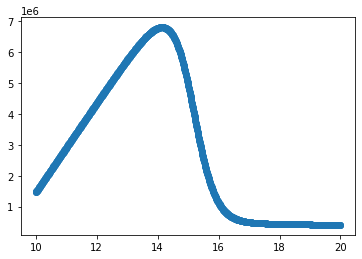

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(20,38, 1000)
plt.scatter(Time, S_data)

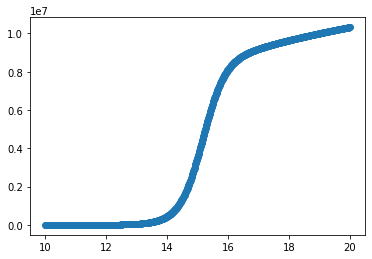

In [33]:
plt.scatter(Time, I_data)

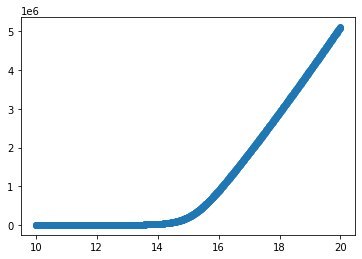

In [34]:
plt.scatter(Time, R_data)

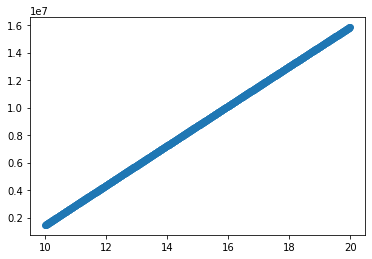

In [35]:
plt.scatter(Time, N_data)